## MNIST
They say MNIST data is the 'hello world' of deeplearning.
The input is a collection of images of hand-written digits and the target is the digit itself.
Historically, this data was used to train algorithms which could then automatically predict the 
zip-code digits on the posts.
Let's understand the data before you create your first neural network for digit recognition

The data set has 60000 rows (each row is an 'image') and 785 attributes
The the first 784 are pixel values which are unrolled row wise , while the last attribute/column is the target
Hence,
pixel0 - pixel27 are pixel values of the first row in the image,   
pixel28 - pixel55 are pixel values of the second row in the image,  
and so on... for 28 rows of pixels values

In [1]:
import numpy as np        
import pandas as pd
#read the data
train = pd.read_csv('D:/DataScience/AdvancedML/NeuralNeworks/MNIST Train Test/train.csv')
print(train.shape)
print(train.columns)

(60000, 785)
Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'label'],
      dtype='object', length=785)


### Visualization
Let's pick a random row (1433) and view the image corresponding to that row.
Change the row number between 0 and 59999 to understand how 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 114 159 253 159 113  51 159
  143  38   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  67 178 225 253 252 252 252 252 238 252
  252  84   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 176 240 252 252 228 148  55  55  55 253 233
  195  65   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  92 243 252 233 145  47   0   0   0   0  84  56
    0   0   0   0   0   0   4  29   0   0]
 [  0   0   0   0   0   0 253 252 252  84   0   0   0   0   0   

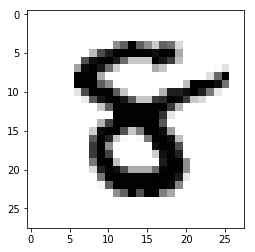

In [4]:
sample_row = 1433 #Some row picked

sample_row = train.iloc[sample_row,:-1] # We skip the last column because it's the target column
transformed_row = sample_row.values.reshape(28, 28) # reshape to 28*28
print(transformed_row)
# now plot the image with matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(transformed_row, cmap = 'gray_r')


Build a neural network on the train dataset of MNIST images


Here are some things you could experiment with 
* Number of layers
* Size of each layer
* Activation of each layer
* Learning rate

The accuracy on test dataset should exceed 95% 



In [5]:
X = train.drop(['label'], axis = 1, inplace=False)  # store pixel values in X
y = train['label']                                  # store the label in y

# import np_utils
from keras.utils import np_utils
y_cat = np_utils.to_categorical(y)                  # change the target variable as a categorical variable

# now split the data to train and validation 
import sklearn
from sklearn.model_selection import train_test_split    
X_train, X_val, y_train, y_val = train_test_split(X, y_cat, test_size = 0.33, random_state = 33)

# store as numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
# read the test data
test = pd.read_csv('D:/DataScience/AdvancedML/NeuralNeworks/MNIST Train Test/test.csv')

print(test.columns)
# pixels and target 
X_test = test.drop(['label'], axis = 1, inplace=False)
y_test = test['label']

# to categorical
y_test_cat = np_utils.to_categorical(y_test)

# numpy arrays
X_test = np.array(X_test)
y_test_cat = np.array(y_test_cat)

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'label'],
      dtype='object', length=785)


In [8]:
# import required packages
from keras.models import Sequential    # model       
from keras.layers import Dense         # layer
from keras.optimizers import Adam      # Optimizer

Lets build a model with out any hidden layer

In [10]:
hidden_model = Sequential()  # initiate the model
hidden_model.add(Dense(200, init='uniform', input_dim = 784, activation='relu')) # input layer
hidden_model.add(Dense(100, init='uniform', activation='relu'))                  # hidden layer
hidden_model.add(Dense(10, activation = 'softmax'))                              #output layer
hidden_model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

hidden_model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=784, activation="relu", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="relu", kernel_initializer="uniform")`
  app.launch_new_instance()


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [12]:
# train the model
history2 = hidden_model.fit(X_train, y_train, batch_size=6000, epochs=20, verbose = 2, 
                    validation_data=(X_val, y_val))

Train on 40200 samples, validate on 19800 samples
Epoch 1/20
 - 4s - loss: 0.0470 - acc: 0.9906 - val_loss: 0.2202 - val_acc: 0.9519
Epoch 2/20
 - 4s - loss: 0.0433 - acc: 0.9916 - val_loss: 0.2197 - val_acc: 0.9520
Epoch 3/20
 - 4s - loss: 0.0396 - acc: 0.9928 - val_loss: 0.2193 - val_acc: 0.9521
Epoch 4/20
 - 4s - loss: 0.0364 - acc: 0.9937 - val_loss: 0.2174 - val_acc: 0.9528
Epoch 5/20
 - 4s - loss: 0.0335 - acc: 0.9946 - val_loss: 0.2187 - val_acc: 0.9526
Epoch 6/20
 - 3s - loss: 0.0313 - acc: 0.9951 - val_loss: 0.2166 - val_acc: 0.9533
Epoch 7/20
 - 4s - loss: 0.0291 - acc: 0.9959 - val_loss: 0.2167 - val_acc: 0.9540
Epoch 8/20
 - 3s - loss: 0.0272 - acc: 0.9964 - val_loss: 0.2179 - val_acc: 0.9534
Epoch 9/20
 - 3s - loss: 0.0256 - acc: 0.9970 - val_loss: 0.2158 - val_acc: 0.9540
Epoch 10/20
 - 4s - loss: 0.0241 - acc: 0.9972 - val_loss: 0.2176 - val_acc: 0.9539
Epoch 11/20
 - 4s - loss: 0.0227 - acc: 0.9976 - val_loss: 0.2171 - val_acc: 0.9542
Epoch 12/20
 - 3s - loss: 0.0216 - 

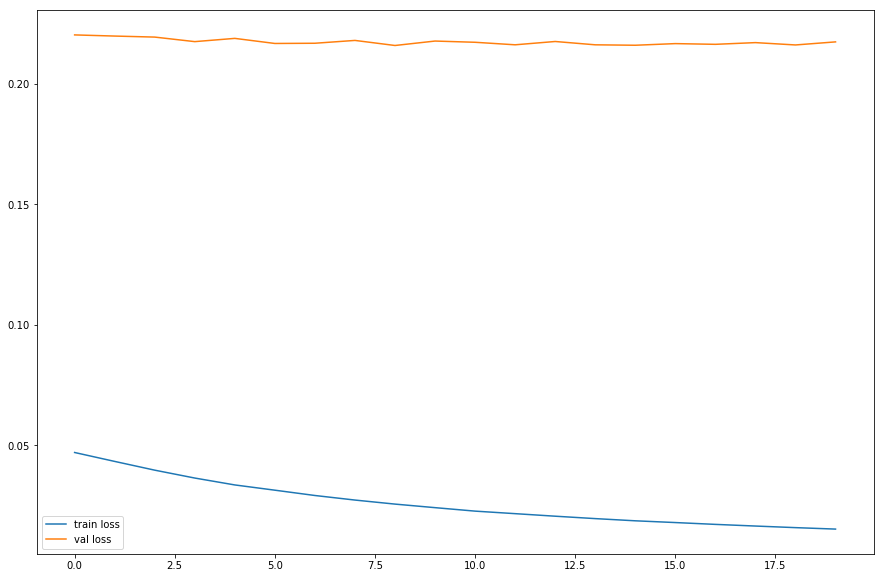

In [13]:
plt.figure(figsize=(15,10))
plt.plot(history2.history['loss'], label = 'train loss')
plt.plot(history2.history['val_loss'], label = 'val loss')
plt.legend()

In [14]:
#predicton test data
hidden_predictions = hidden_model.predict_classes(X_test)

# find the acuracy of predictions
from sklearn.metrics import accuracy_score
accuracy_score(y_test, hidden_predictions)

10000/10000 [==============================] - 1s 84us/step


0.9597